## COMP 341: Practical Machine Learning
## Homework assignment 1: exploring baby names

### Due: Tuesday, September 6 at 11:59pm on Gradescope

The goal of this homework is to analyze the baby name data from the US Social Security Agency. We will explore various facets of the data and see if there is enough information to predict a person's age given only their first name. While we won't be using an ML model just yet we will use data science skills to explore interesting patterns.

Fill in the missing code following `# TODO:` comments or `####### YOUR CODE HERE ########` blocks and be sure to answer the short answer questions marked with `[WRITE YOUR ANSWER HERE]` in the text.

All code in this notebook needs to be able to be run sequentially, so make sure things work in order! Be sure to also use good coding practices (e.g., logical variable names, comments as needed, etc), and make plots that are clear and readable (e.g., with legible axes).

For this assignment, there will be **15 points** allocated for general coding points:
* **10 points** for coding style
* **5 points** for code flow (accurate results when everything is run sequentially)

### Setup

First, we need to import some libraries that are necessary to complete the assignment.

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

Here, we have also suggested some other modules/libraries to import that can make your life easier:
*   [glob](https://docs.python.org/3/library/glob.html) is useful for pattern-based pathname expansion, which can come in handy when reading in the data

Feel free to also add your own here (rather than wherever you first use them below).

In [ ]:
import glob

### Part 0: Read in Data [5 pts]

Run the following code that uses common command line tools (jupyter knows that it is command line and not python based on the `!` at the beginning of the command) to download and unzip the national data linked on the [SSA website](https://www.ssa.gov/oact/babynames/limits.html) into your workspace.

In [ ]:
# downloading the data
!wget https://www.ssa.gov/oact/babynames/names.zip
# unzipping the data quietly to a "names" directory
!unzip -q names.zip -d names

--2022-10-05 02:13:02--  https://www.ssa.gov/oact/babynames/names.zip
Resolving www.ssa.gov (www.ssa.gov)... 23.47.144.149, 23.47.144.132, 2600:1408:c400:11::17cd:6b4d, ...
Connecting to www.ssa.gov (www.ssa.gov)|23.47.144.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7405327 (7.1M) [application/zip]
Saving to: ‘names.zip’

names.zip           100%[===================>]   7.06M  --.-KB/s    in 0.09s   

2022-10-05 02:13:02 (79.3 MB/s) - ‘names.zip’ saved [7405327/7405327]



Now, we first need to check how the SSA has structured their data by looking at what we have unzipped.

In [ ]:
# lists the contents of the "names" directory
!ls names

NationalReadMe.pdf  yob1908.txt  yob1937.txt  yob1966.txt  yob1995.txt
yob1880.txt	    yob1909.txt  yob1938.txt  yob1967.txt  yob1996.txt
yob1881.txt	    yob1910.txt  yob1939.txt  yob1968.txt  yob1997.txt
yob1882.txt	    yob1911.txt  yob1940.txt  yob1969.txt  yob1998.txt
yob1883.txt	    yob1912.txt  yob1941.txt  yob1970.txt  yob1999.txt
yob1884.txt	    yob1913.txt  yob1942.txt  yob1971.txt  yob2000.txt
yob1885.txt	    yob1914.txt  yob1943.txt  yob1972.txt  yob2001.txt
yob1886.txt	    yob1915.txt  yob1944.txt  yob1973.txt  yob2002.txt
yob1887.txt	    yob1916.txt  yob1945.txt  yob1974.txt  yob2003.txt
yob1888.txt	    yob1917.txt  yob1946.txt  yob1975.txt  yob2004.txt
yob1889.txt	    yob1918.txt  yob1947.txt  yob1976.txt  yob2005.txt
yob1890.txt	    yob1919.txt  yob1948.txt  yob1977.txt  yob2006.txt
yob1891.txt	    yob1920.txt  yob1949.txt  yob1978.txt  yob2007.txt
yob1892.txt	    yob1921.txt  yob1950.txt  yob1979.txt  yob2008.txt
yob1893.txt	    yob1922.txt  yob1951.txt  yob1980.txt  yob

The included `NationalReadMe.pdf` file describes how the data is organized. We have taken the liberty of summarizing the main points:
* data for each year is included as a separate file and clearly indicated in the filename
* the data spans all years between 1880-2021
* each file is comma-delimited
* each row provides a baby name, whether the name was given to a male or female baby, and corresponding number of births for that year
* only names with at least 5 births for the corresponding year is listed in its file (for privacy reasons)

We can quickly take a look at the top of the file for baby names in 1880.

In [ ]:
!head names/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


And also peruse the bottom of the file for baby names in 2021.

In [ ]:
!tail names/yob2021.txt

Zhion,M,5
Zierre,M,5
Zinedine,M,5
Zuhayr,M,5
Zvi,M,5
Zyeire,M,5
Zyel,M,5
Zyian,M,5
Zylar,M,5
Zyn,M,5


Now that we have a reasonably good understanding of how the data is structured, it is time to read in the data from all of the different years and combine everything into one pandas DataFrame for further analysis. Remember to use intuitive column names and that we need to keep track of the year the data came from!

In [ ]:
# TODO: read in data
files = glob.iglob('names/*.txt')
all_df = []

# Create a DataFrame for each file
for file in files:
  year = pd.read_csv(file, names=['name', 'sex', 'frequency'])
  year['year'] = int(file[len('names/yob'):len('names/yob') + 4])
  all_df.append(year)


# Combine the DataFrames
babies = pd.concat(all_df).sort_values(by='year')

### Part 1: Sanity Checks [3 pts]

A good habit to get into is checking your data frames; evaluating if they match expectation early and often can help you spot errors before they pop up later. Here, check the size of your data frame (*hint: should have 2,052,781 rows*) and look at the top and bottom of your data frame.

In [ ]:
# TODO: check data frame dimensions
babies.shape

(2052781, 4)

In [ ]:
# TODO: look at the top of data frame
babies.head()

,name,sex,frequency,year
464,Veronica,F,14,1880
1320,Wash,M,21,1880
1319,Minor,M,21,1880
1318,Karl,M,21,1880
1317,Hans,M,21,1880


In [ ]:
# TODO: look at the bottom of data frame
babies.tail()

,name,sex,frequency,year
19327,Vito,M,89,2021
19326,Mavrick,M,89,2021
19325,Kobi,M,89,2021
19323,Hiram,M,89,2021
29305,Rizvan,M,6,2021


### Part 2: Search for General Patterns [10 pts]

Let's check out the spread of the data in the most general way possible, the total number of births per year. First, plot the distribution of births across all years in our data (1880-2021), with different colors for the sex of the baby. Make sure that your axes are labeled clearly, the figure is sized appropriately, and in general, that your figure makes it easy to examine the number of births for any particular year of interest (one key component of this is the density of your tick labels).

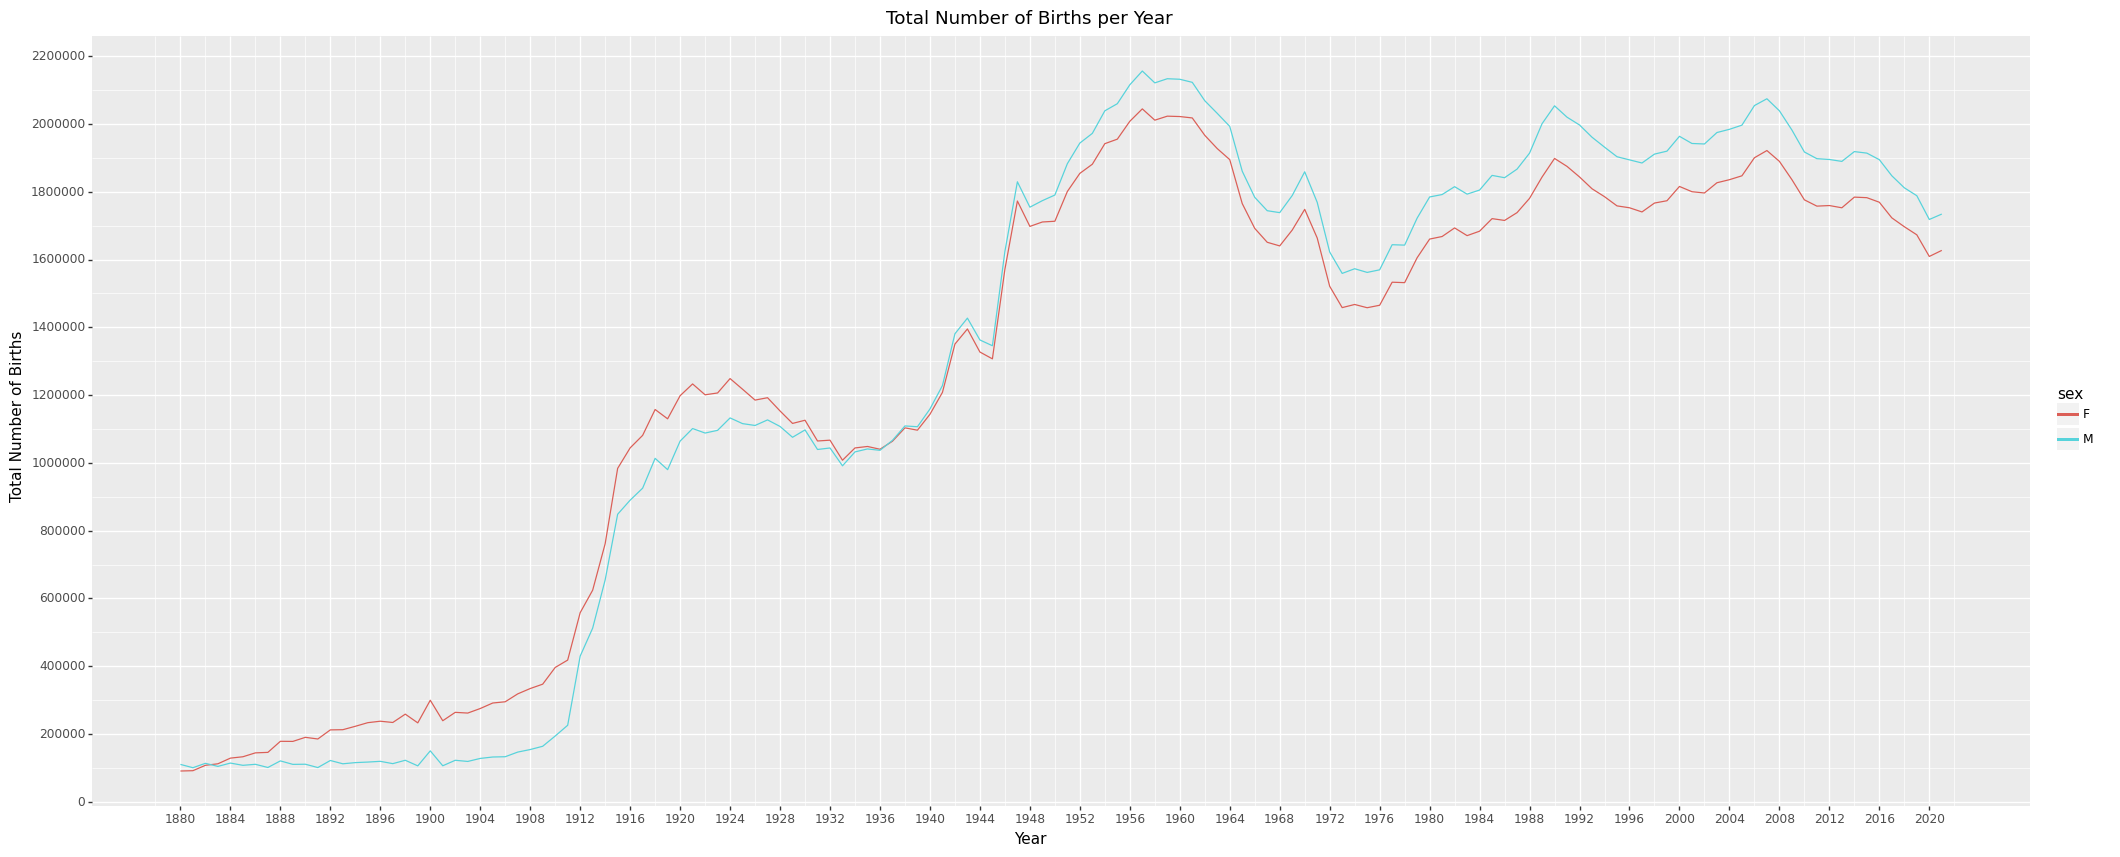

<ggplot: (8745686673693)>

In [ ]:
# TODO: plot total births per year with colors for sex (Male/Female)

# sum all male and female births for each year
total_per_year = babies.groupby(['year', 'sex']).frequency.sum().reset_index()

(ggplot(total_per_year, aes(x='year', y='frequency', color='sex'))
 + geom_line()
 + scale_x_continuous(breaks = list(range(1880, 2022, 4)))
 + scale_y_continuous(breaks = list(range(0, 2250001, 200000)))
 + ggtitle('Total Number of Births per Year')
 + xlab('Year')
 + ylab('Total Number of Births')
 + theme(figure_size=(25, 10)))

**Short Answer Question:** Do you notice any interesting patterns across years? Do they relate to historical events?



`[WRITE YOUR ANSWER HERE]`

Overtime, we see an increase in total number of births. An interesting pattern is the big increase during 1911-1916. This corrresponds to WW1, which makes sense since war time drives up birth rates. We also see another big increase during 1940-1956, which corresponds to WW2. The positive curve during 1946-1964 also corresponds to the baby boom period.

### Part 3: Disentangling the Sexes [6 pts]

Some names that we now associate with a specific sex might not have always been that way. Consider the name, Ruth, which is now more often associated with women. In our data, are there any boys named Ruth? Let's investigate.

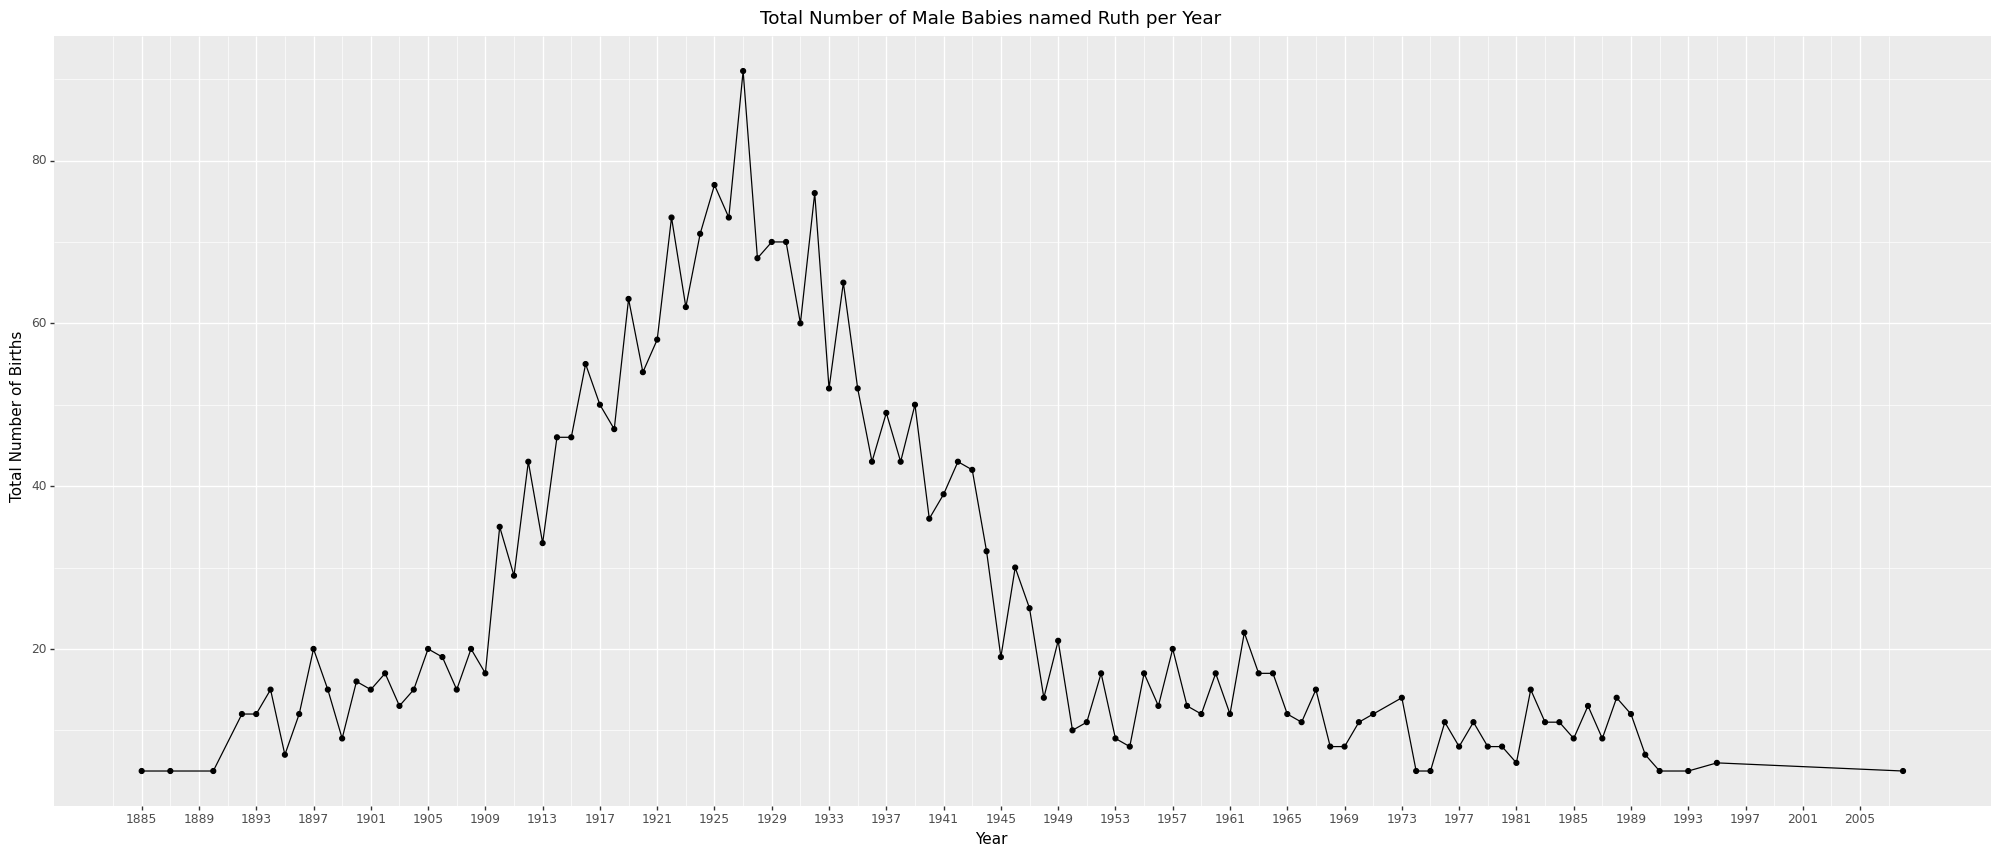

<ggplot: (8745686668297)>

In [ ]:
# TODO: make a plot showing baby boys named Ruth over time

ruth_m = babies.loc[(babies.name == 'Ruth') & (babies.sex == 'M')]

(ggplot(ruth_m, aes(x='year', y='frequency'))
+ geom_line()
+ geom_point()
+ scale_x_continuous(breaks = range(min(ruth_m.year), max(ruth_m.year), 4))
+ scale_y_continuous(breaks = list(range(0, 101, 20)))
+ ggtitle('Total Number of Male Babies named Ruth per Year')
+ xlab('Year')
+ ylab('Total Number of Births')
+ theme(figure_size=(25, 10)))

In [ ]:
# TODO: find which year had the most boys born named Ruth and how many there were in that year
max_ruth = ruth_m.loc[ruth_m.frequency == ruth_m.frequency.max()]
print(max_ruth)
# The year is 1927 and there were 91 male babies named Ruth born that year

      name sex  frequency  year
6276  Ruth   M         91  1927


**Short Answer Question:** Do you think the famous baseball player, Babe Ruth, had any influence on boys named Ruth? Comment on this.



`[WRITE YOUR ANSWER HERE]`

Yes. Babe Ruth was playing between 1914-1935 and during that time we see a splike in babies named Ruth. The spike initiated at about when he started playing and peak in the middle of his career. People name their babies after famous people.

### Part 4: Oldest and Youngest [50 pts]
Now that we've seen that there can be unexpected confounders that we need to control (e.g., cannot make any preconceptions about the sex-specificity of names), let's try to see if we can find the oldest and youngest names for men and women in our data. Here, "oldest" is loosely used to refer to names that were popular in the past (near the beginning of our dataset in the 1880s) and "youngest" for those that are emerging now.

First, we need to set some filters to exclude highly uncommon names, given that our dataset includes all names with at least 5 people born with that name per year.

In [ ]:
# TODO: filter the name data to include the (name, sex) pairs that have been
# used at least 20,000 times in the entire dataset and look at the new DataFrame
# this will help remove uncommon names

# find total number of births for each (name, sex) pairs across all years
sum = babies.groupby(['name', 'sex']).frequency.sum().reset_index().sort_values(by='name')
filtered = sum.loc[sum.frequency >= 20000] # remove (name, sex) less than 20000

mask = filtered.drop(columns='frequency') # keep only name, sex to use as mask

# keep only (name, sex) that are popular from the big data set. This is used for median and mean calculations
common = pd.merge(mask, babies, on=['name', 'sex'], how='inner')

How many names were filtered out?

In [ ]:
# TODO: calculate how many total names were filtered out
print(sum.shape[0] - filtered.shape[0]) # 110822 (name, sex) pairs

110822


Next, we need some proxy for around which era certain names became popular. For this, we can use the simple, but imprecise metrics of median and mean ocurrences.

In [ ]:
# TODO: identify the median and mean year when each name is popular by
# building 2 DataFrames, where mean_year and median_year are rounded to an int
# the first with name, sex, median_year
# the second with with name, sex, mean_year
# (HINT: numpy's repeat method can be helpful here)

median_dict = {"name":[], "sex":[], "median_year":[]}
mean_dict = {"name":[], "sex":[], "mean_year":[]}

grouped = common.groupby(['name', 'sex'])

# Iterate through each (name, sex) groups
for name_sex, group in grouped:
  name, sex = name_sex
  years = []

  # add the year to years array by frequency times
  for idx, row in group.iterrows():
    years.extend(np.repeat(row.year, row.frequency))

  # append name, sex, and year to each list in the dict - representing 1 row in our new df
  median_dict['name'].append(name)
  median_dict['sex'].append(sex)
  median_dict['median_year'].append(np.rint(np.median(years)))

  mean_dict['name'].append(name)
  mean_dict['sex'].append(sex)
  mean_dict['mean_year'].append(np.rint(np.mean(years)))

median = pd.DataFrame(median_dict)
median = median.astype({'median_year': 'int32'}) # remove trailing .0

mean = pd.DataFrame(mean_dict)
mean = mean.astype({'mean_year': 'int32'}) # remove trailing .0

In [ ]:
# TODO: combine the mean, median year, and total count information into one
# DataFrame, and take a look at the DataFrame once it is sorted
# specifically, sort first by median_year, and in the event of ties, by mean_year,
# and finally by the total occurrences of the name

# merge the median and mean DataFrames
combined = pd.merge(median, mean, on=['name', 'sex'])

# add the frequency column for plot later. Sort from oldest to youngest
combined = pd.merge(combined, filtered, on=['name', 'sex'], how='inner').sort_values(by=['median_year', 'mean_year', 'frequency']).reset_index()

In [ ]:
# TODO: what are the top 10 "youngest" (most recently popular) female names?
combined.loc[combined.sex == 'F'].iloc[-10:]

# From youngest to oldest we have [Everly, Luna, Nova, Arya, Mila, Kinsley, Isla, Raelynn, Harper, Adalynn]

,index,name,sex,median_year,mean_year,frequency
1784,9,Adalynn,F,2016,2016,26334
1785,713,Harper,F,2016,2016,108675
1787,1430,Raelynn,F,2017,2014,24718
1788,772,Isla,F,2017,2014,36134
1790,1017,Kinsley,F,2017,2015,37423
1792,1280,Mila,F,2017,2015,61710
1793,129,Arya,F,2017,2016,21427
1794,1355,Nova,F,2018,2007,34700
1795,1149,Luna,F,2018,2013,57494
1797,602,Everly,F,2018,2018,30495


In [ ]:
# TODO: what are the top 10 "oldest" (popular longest ago) female names?
combined.loc[combined.sex == 'F'].iloc[:10]
#From oldest to youngest we have [Maude, Mabel, Minnie, Effie, Nannie, Bassie, Blanche, Myrtle, Gertrude, Flossie]

,index,name,sex,median_year,mean_year,frequency
0,1241,Maude,F,1900,1905,45598
1,1160,Mabel,F,1914,1918,137208
2,1287,Minnie,F,1915,1915,159053
3,519,Effie,F,1915,1917,43925
4,1314,Nannie,F,1916,1914,25560
5,178,Bessie,F,1916,1917,170086
6,196,Blanche,F,1917,1916,87384
7,1310,Myrtle,F,1917,1916,136463
8,664,Gertrude,F,1917,1916,176986
9,620,Flossie,F,1917,1918,21803


In [ ]:
# TODO: what are the top 10 "youngest" male names?
combined.loc[combined.sex == 'M'].iloc[-10:]

# From youngest to oldest we have [Maverick, Luca, Mateo, Adriel, Greyson, Kingston, Ryker, Karter, Beckett, Rowan]

,index,name,sex,median_year,mean_year,frequency
1775,1515,Rowan,M,2016,2014,32712
1776,162,Beckett,M,2016,2015,20583
1777,958,Karter,M,2016,2015,23375
1779,1530,Ryker,M,2016,2015,32951
1780,1016,Kingston,M,2016,2015,36973
1781,691,Greyson,M,2016,2015,47991
1786,21,Adriel,M,2017,2013,20554
1789,1234,Mateo,M,2017,2014,82438
1791,1137,Luca,M,2017,2015,45010
1796,1245,Maverick,M,2018,2015,43904


In [ ]:
# TODO: what are the top 10 "oldest" male names?
combined.loc[combined.sex == 'M'].iloc[:10]

# From oldest to youngest we have [Woodrow, Elmer, Charley, Grover, Johnie, Orville, Homer, Emil, Irving, Wilbur]

,index,name,sex,median_year,mean_year,frequency
33,1778,Woodrow,M,1921,1933,38730
67,544,Elmer,M,1924,1930,128902
80,314,Charley,M,1925,1932,23611
85,693,Grover,M,1926,1928,27008
89,896,Johnie,M,1926,1930,20901
90,1368,Orville,M,1926,1930,35012
91,742,Homer,M,1926,1930,60789
100,559,Emil,M,1926,1936,32404
101,765,Irving,M,1926,1937,43967
108,1763,Wilbur,M,1927,1931,56769


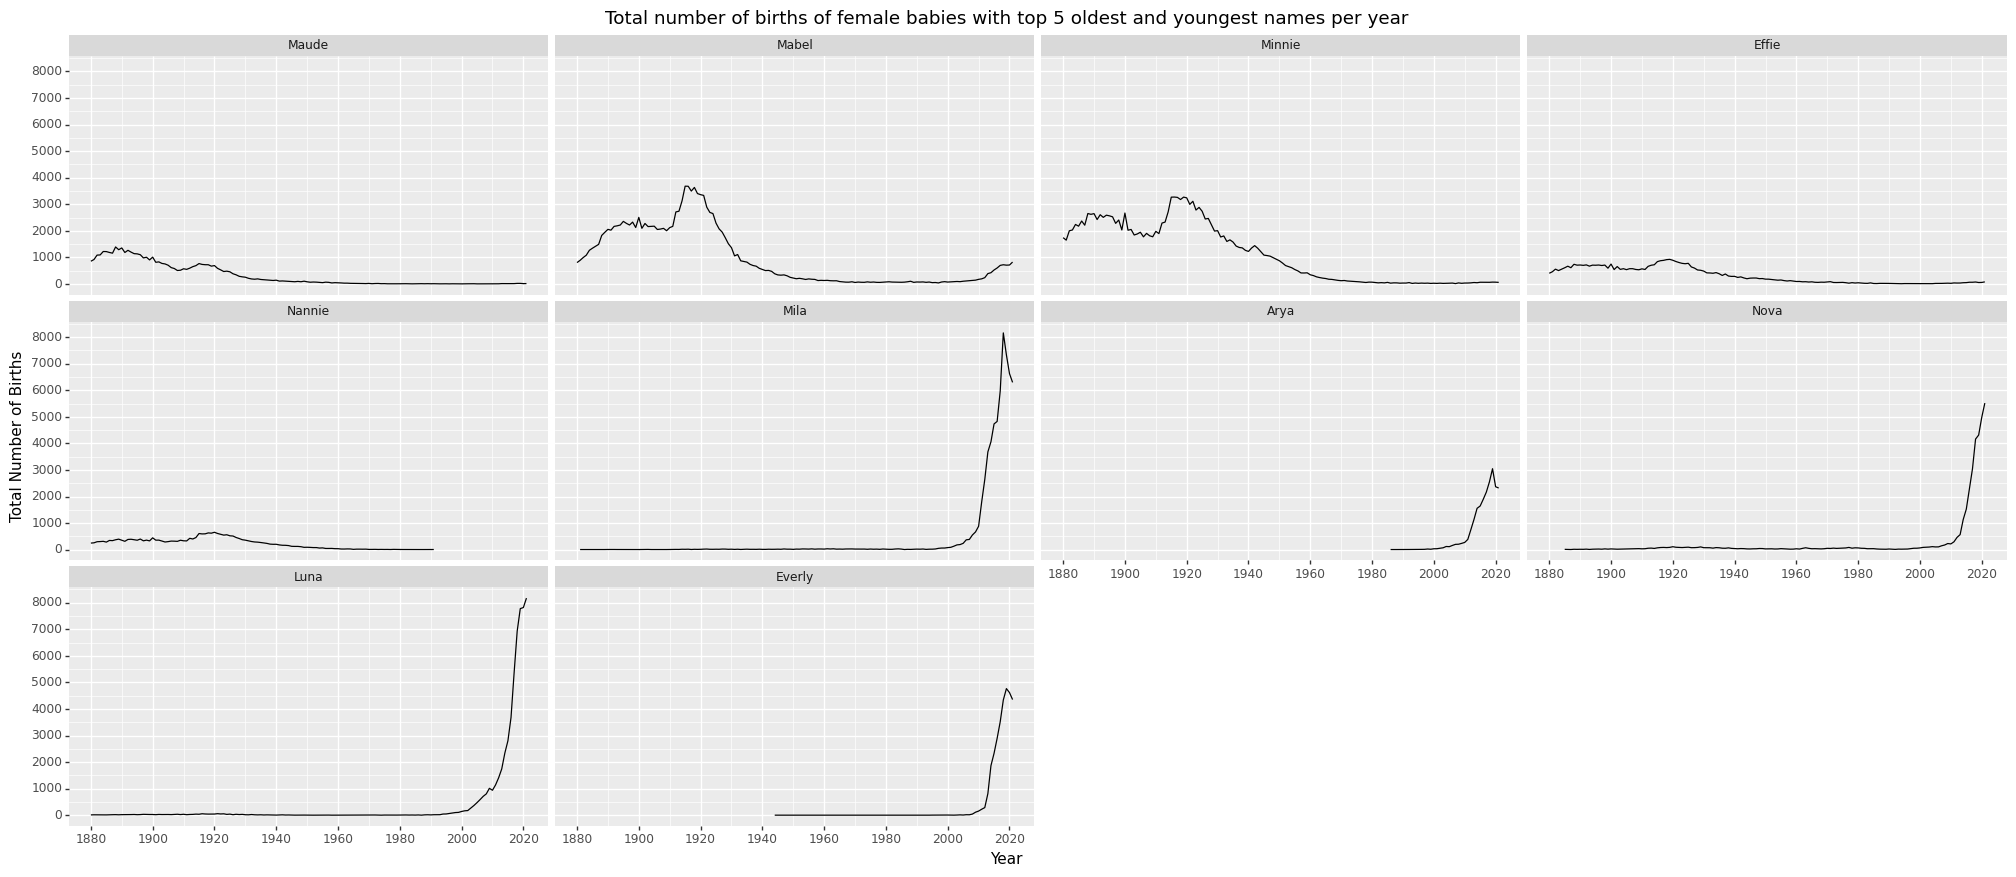

<ggplot: (8745682400673)>

In [ ]:
# TODO: using a single plot (can have different subplots within), show
# the number of babies born each year with the top 5 oldest and youngest female names,
# with the oldest names first and youngest names last

oldest_f = combined.loc[combined.sex == 'F'].head(5)
youngest_f = combined.loc[combined.sex == 'F'].tail(5)

# Get a list of top 5 oldest and youngest names
names_old = oldest_f.name.tolist()
names_young = youngest_f.name.tolist()

# find total number of birth for (name, sex) for each year
name_per_year = babies.groupby(['name', 'sex', 'year']).frequency.sum().reset_index()

# keep only (name, sex) that are in the top 5 oldest and youngest
old_df = name_per_year.loc[(name_per_year.name.isin(names_old)) & (name_per_year.sex == 'F')]
young_df = name_per_year.loc[(name_per_year.name.isin(names_young)) & (name_per_year.sex == 'F')]

combined_popular = pd.concat([old_df, young_df], ignore_index=True)

# Convert name to categorical for facets sorting
combined_popular['name'] = pd.Categorical(combined_popular['name'], categories=(names_old + names_young))

(ggplot(combined_popular, aes(x='year', y='frequency'))
+ geom_line()
+ facet_wrap('name')
+ scale_y_continuous(breaks = range(0, max(combined_popular.frequency), 1000))
+ scale_x_continuous(breaks = range(min(combined_popular.year), max(combined_popular.year), 20))
+ ggtitle('Total number of births of female babies with top 5 oldest and youngest names per year')
+ xlab('Year')
+ ylab('Total Number of Births')
+ theme(figure_size=(25, 10)))


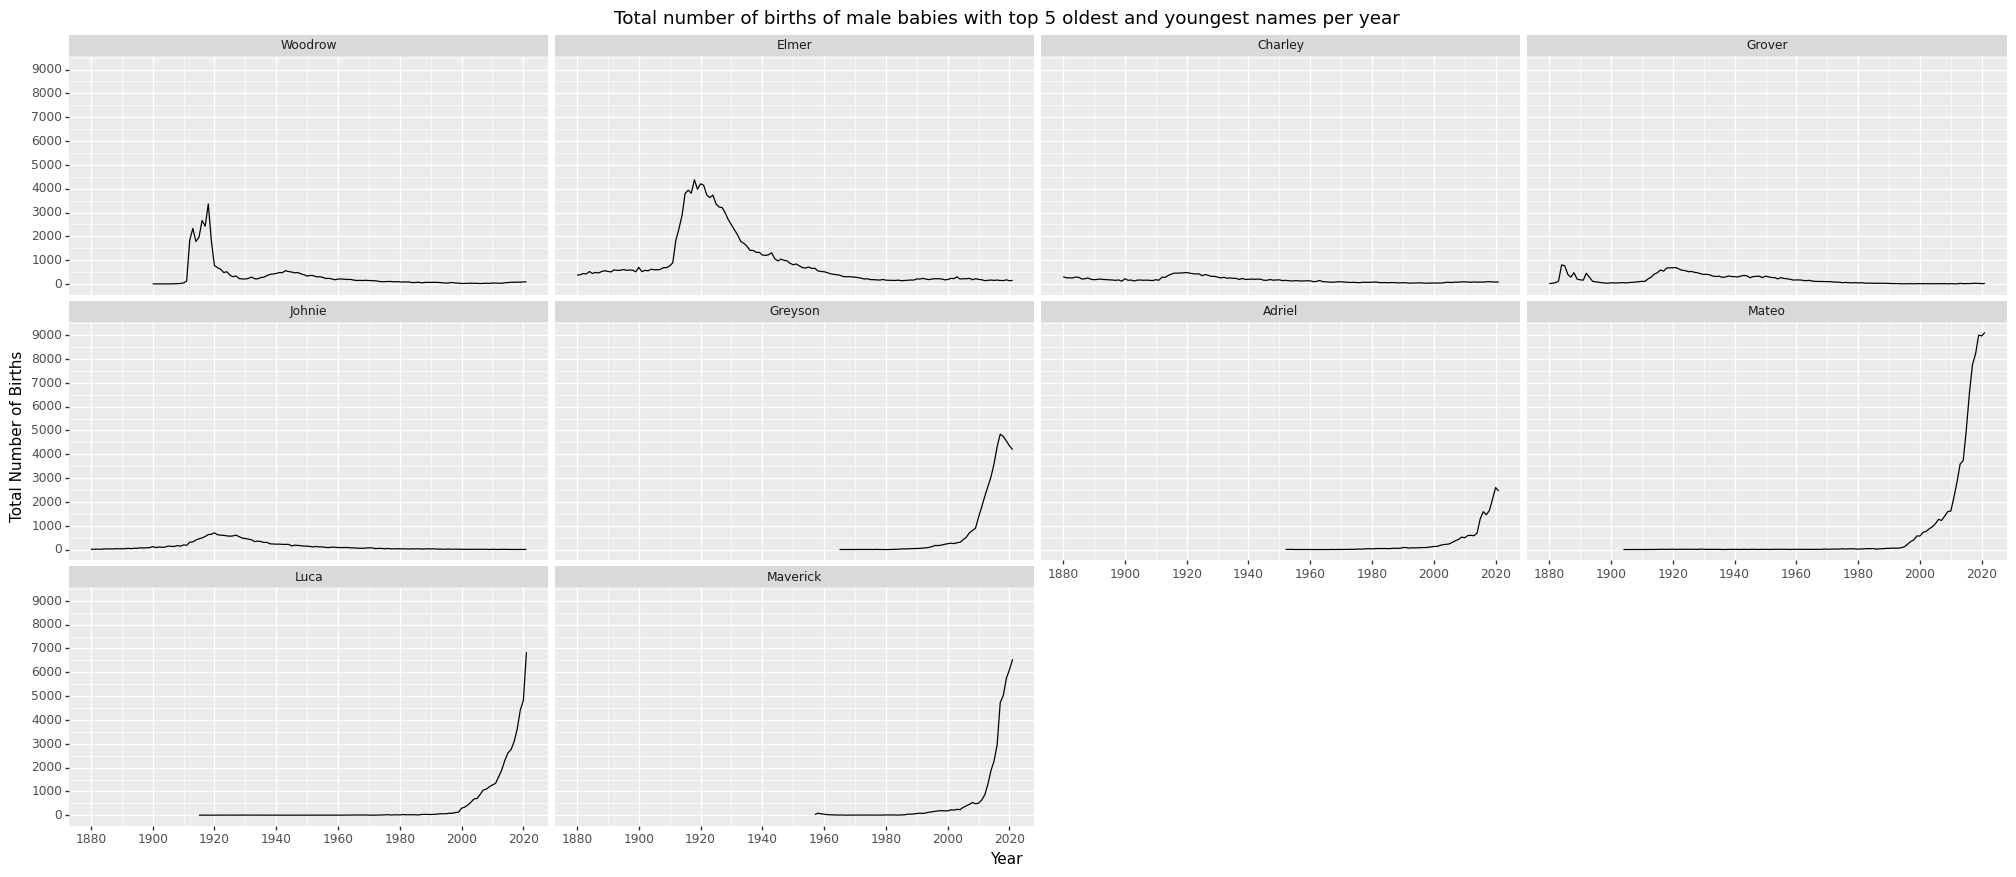

<ggplot: (8745685154349)>

In [ ]:
# TODO: using a single plot (can have different subplots within), now show
# the number of babies born each year with the top 5 oldest and youngest male names,
# with the oldest names first and youngest names last

oldest_m = combined.loc[combined.sex == 'M'].head(5)
youngest_m = combined.loc[combined.sex == 'M'].tail(5)

# Get a list of top 5 oldest and youngest names
names_old = oldest_m.name.tolist()
names_young = youngest_m.name.tolist()

# find total number of birth for (name, sex) for each year
name_per_year = babies.groupby(['name', 'sex', 'year']).frequency.sum().reset_index()

# keep only (name, sex) that are in the top 5 oldest and youngest
old_df = name_per_year.loc[(name_per_year.name.isin(names_old)) & (name_per_year.sex == 'M')]
young_df = name_per_year.loc[(name_per_year.name.isin(names_young)) & (name_per_year.sex == 'M')]

combined_popular = pd.concat([old_df, young_df], ignore_index=True)

# Convert name to categorical for facets sorting
combined_popular['name'] = pd.Categorical(combined_popular['name'], categories=(names_old + names_young))

(ggplot(combined_popular, aes(x='year', y='frequency'))
+ geom_line()
+ facet_wrap('name')
+ scale_y_continuous(breaks = range(0, max(combined_popular.frequency), 1000))
+ scale_x_continuous(breaks = range(min(combined_popular.year), max(combined_popular.year), 20))
+ ggtitle('Total number of births of male babies with top 5 oldest and youngest names per year')
+ xlab('Year')
+ ylab('Total Number of Births')
+ theme(figure_size=(25, 10)))

**Short Answer Question:** Recall the plot we made earlier showing total births over time. Do you think that the birth rate can influence the oldest and youngest names we identified? If so, is there a more robust way to choose the "oldest" and "youngest" names?

`[WRITE YOUR ANSWER HERE]`

Yes, birth rate can influence the oldest and youngest names because we are determining old and young based on median year and mean year. The higher birth rate towards the present means that there are more data with a more recent year which skews the median and mean years toward the present.

A more robust way could be: firstly, for each (name, sex) and year, we find the proportion of babies born with that name and sex to the total amount of babies born that year. Then, we can calculate the median and mean years with weights for each year depending on the proportion. This way, the birth rate can less influence our decision of old and young names.


### Part 5: Making Predictions [11 pts]
Simple data-driven models like this can help inform more sophisticated machine learning approaches to take later. Let's wrap up by seeing how well we can do predicting the ages of some people given only their names.

In [ ]:
# TODO: using our imperfect techniques, we will make the simplifying assumption
# that given a name, their birthdate is 1/1/median_year

# predict the ages for the following men today:
# Gerald, Kai, Spencer, Jeffrey

# share your results as "name: age"

names = ['Gerald', 'Kai', 'Spencer', 'Jeffrey']
combined['age'] = 2022 - combined.median_year
combined.loc[(combined.name.isin(names)) & (combined.sex == 'M')] # {Gerald: 75, Kai: 8, Spencer: 27, Jeffrey: 54}

,index,name,sex,median_year,mean_year,frequency,age
364,660,Gerald,M,1947,1949,448182,75
753,850,Jeffrey,M,1968,1971,977190,54
1203,1614,Spencer,M,1995,1990,120250,27
1722,942,Kai,M,2014,2011,51683,8


In [ ]:
# TODO: Likewise predict the ages for the following women: Madison, Katherine, Anna, Simone

names = ['Madison', 'Katherine', 'Anna', 'Simone']
combined.loc[(combined.name.isin(names)) & (combined.sex == 'F')] # {Madison: 18, Katherine: 46, Anna: 84, Simone: 29}

,index,name,sex,median_year,mean_year,frequency,age
249,105,Anna,F,1938,1949,903416,84
855,966,Katherine,F,1976,1968,644009,46
1156,1601,Simone,F,1993,1990,26446,29
1448,1173,Madison,F,2004,2005,399373,18


**Short Answer Question:** Do the predicted ages match what you have experienced in meeting people with these names? Would you rely on our predictions for guessing the age of people? Why or why not?

`[WRITE YOUR ANSWER HERE]`

The model did a pretty good job at guessing these names. Kai, Spencer, Anna and Madison seems like young names, and the model predicts pretty young ages (8, 27, 18, 18). Gerald, Jeffery, and Katherine also seem like old names, and the model predicts that too (75, 54, 46). But, it was not that accurate at some names like Anna who I think should be younger.

I would not use this model for guessing the age of people because of the inaccuracy caused by our calculation of median is somewhat affected by the varying amount of birth rates across the years as explained in previous questions. Eventhough it was quite accurate at predicting the age of some names, there were still some errors for names like Anna.

**Short Answer Question:** Based on your understanding of the data and means versus medians, what difference does choosing "old" and "young" names using median year or mean year make? What if you chose based on mode (the total births) or another metric? How do you think these choices would affect the results?

`[WRITE YOUR ANSWER HERE]`

1) Choosing old and young names based on mean may cause outliers to influence our calculations. Median on the other hand is more robust especially since our data is skewed by birth rates. For example, if we choose based on mean, names that are more popular in the past may be ranked as younger because we have more data with the name in more recent years even if the name is not considered popular recently. Median may still have this problem, but less so than mean.

2) Assuming mode in this case means that we calculate mean and median with weight on the proportion of babies born with that name to the total births each year (as explained in an earlier question), mode could be a more accurate representation of old and young names. This could result in our data-based predictions to be more accurate.

**Extra Credit:** Test out another metric that you believe may be a better way to predict someone's age from their name purely based on the data (no ML models), with a short demonstration and explanation of why you think it is better. [**up to 5 points**]

# To Submit
Download the notebook from Colab as a `.ipynb` notebook (`File > Download > Download .ipynb`) and upload it to the corresponding Gradescope assignment. Your assignment should be named `comp341-hw1.ipynb`.